In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import os

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Data 

* Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977

* The data consists of 8 column and 1000 rows

### 1. Import the data

In [2]:
df = pd.read_csv("../data/used-cars-price-prediction/train-data.csv")
df_test = pd.read_csv("../data/used-cars-price-prediction/test-data.csv")

In [3]:
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


#### Shape of the dataset

In [4]:
print(f'Rows: {df.shape[0]}\nColumns: {df.shape[1]}')

Rows: 6019
Columns: 14


#### Data information

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [6]:
df.describe()

,Unnamed: 0,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,3009.000000,2013.358199,5.873838e+04,5.278735,9.479468
std,1737.679967,3.269742,9.126884e+04,0.808840,11.187917
min,0.000000,1998.000000,1.710000e+02,0.000000,0.440000
25%,1504.500000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3009.000000,2014.000000,5.300000e+04,5.000000,5.640000
75%,4513.500000,2016.000000,7.300000e+04,5.000000,9.950000
max,6018.000000,2019.000000,6.500000e+06,10.000000,160.000000


In [7]:
df.drop('Unnamed: 0' , axis =1 , inplace = True )

In [8]:
df_clean = df.copy()

In [9]:
df_clean.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


#### Check Missing Values

In [10]:
df_clean.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [11]:
df_clean.isnull().mean() * 100

Name                  0.000000
Location              0.000000
Year                  0.000000
Kilometers_Driven     0.000000
Fuel_Type             0.000000
Transmission          0.000000
Owner_Type            0.000000
Mileage               0.033228
Engine                0.598106
Power                 0.598106
Seats                 0.697790
New_Price            86.310018
Price                 0.000000
dtype: float64

* We drop the column of New_Price because the missing values from it are more than 86% of the total data
* We drop the missing values of Mileage,Engine, Power and Seats because they are less than 1% of the total data

In [12]:
df_clean.drop('New_Price' , axis =1 , inplace = True )

In [13]:
df_clean.dropna(subset='Mileage', inplace=True)

In [14]:
df_clean.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

In [15]:
# Convert Milage to int
def convert_milage_to_int(milage):
    new_milage =  float(milage.split(' ')[0])
    if milage.split(' ')[1] == 'km/kg':
        new_milage = new_milage * 0.74

    return new_milage


df_clean['Mileage'] = df_clean['Mileage'].apply(convert_milage_to_int)

In [16]:
df_clean.head(3)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,19.684,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.670,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.200,1199 CC,88.7 bhp,5.0,4.50


In [17]:
df_clean[df_clean.Seats == 0]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
3999,Audi A4 3.2 FSI Tiptronic Quattro,Hyderabad,2012,125000,Petrol,Automatic,First,10.5,3197 CC,null bhp,0.0,18.0


In [18]:
df_clean.Seats = df_clean.Seats.replace(0, np.nan)

In [19]:
df_clean.Seats.value_counts().sort_values(ascending=False)

Seats
5.0     5012
7.0      674
8.0      134
4.0       99
6.0       31
2.0       16
10.0       5
9.0        3
Name: count, dtype: int64

In [20]:
df_clean['Engine'] = df_clean['Engine'].str.rstrip(' CC')
df_clean['Power'] = df_clean['Power'].str.rstrip(' bhp')

In [21]:
df_clean.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,19.684,998,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.670,1582,126.2,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.200,1199,88.7,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.770,1248,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.200,1968,140.8,5.0,17.74


In [22]:
df_clean['Engine'] = df_clean['Engine'].astype('float')
df_clean['Power']=pd.to_numeric(df_clean['Power'] , errors = 'coerce')

#### Check Duplicates

In [23]:
df_clean.duplicated().sum()

0

There are no duplicate values in the dataset

#### Check data information

In [24]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6017 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6017 non-null   object 
 1   Location           6017 non-null   object 
 2   Year               6017 non-null   int64  
 3   Kilometers_Driven  6017 non-null   int64  
 4   Fuel_Type          6017 non-null   object 
 5   Transmission       6017 non-null   object 
 6   Owner_Type         6017 non-null   object 
 7   Mileage            6017 non-null   float64
 8   Engine             5981 non-null   float64
 9   Power              5874 non-null   float64
 10  Seats              5974 non-null   float64
 11  Price              6017 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 611.1+ KB


#### Name

In [25]:
df_clean['Name'].nunique()

1874

In [26]:
df_clean['brand'] = df_clean['Name'].str.split(' ').str[0]

In [27]:
df_clean['brand'].nunique()

31

In [28]:
df_clean.drop('Name' , axis =1 , inplace = True )

In [29]:
df_clean.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,brand
0,Mumbai,2010,72000,CNG,Manual,First,19.684,998.0,58.16,5.0,1.75,Maruti
1,Pune,2015,41000,Diesel,Manual,First,19.670,1582.0,126.20,5.0,12.50,Hyundai
2,Chennai,2011,46000,Petrol,Manual,First,18.200,1199.0,88.70,5.0,4.50,Honda
3,Chennai,2012,87000,Diesel,Manual,First,20.770,1248.0,88.76,7.0,6.00,Maruti
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.200,1968.0,140.80,5.0,17.74,Audi


#### Check statistics of data set

In [30]:
df_clean.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,6017.000000,6.017000e+03,6017.000000,5981.000000,5874.000000,5974.000000,6017.000000
mean,2013.358152,5.874228e+04,18.065078,1621.505935,113.272203,5.279712,9.478340
std,3.269967,9.128375e+04,4.512023,601.117630,53.873317,0.806138,11.189605
min,1998.000000,1.710000e+02,0.000000,624.000000,34.200000,2.000000,0.440000
25%,2011.000000,3.400000e+04,15.100000,1198.000000,75.000000,5.000000,3.500000
50%,2014.000000,5.300000e+04,18.150000,1493.000000,97.700000,5.000000,5.640000
75%,2016.000000,7.300000e+04,21.020000,1984.000000,138.100000,5.000000,9.950000
max,2019.000000,6.500000e+06,28.400000,5998.000000,560.000000,10.000000,160.000000


#### Check categories in each column

In [31]:
# define numerical & categorical columns

numerical_features = [feature for feature in df_clean.columns if df_clean[feature].dtype != 'O']
categorical_features = [feature for feature in df_clean.columns if df_clean[feature].dtype == 'O']

# print columns

print("we have {} numerical features  : {}".format(len(numerical_features),numerical_features))
print("we have {} categorical features: {}".format(len(categorical_features),categorical_features))

we have 7 numerical features  : ['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']
we have 5 categorical features: ['Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'brand']


In [32]:
for feature in categorical_features:
    print("Categores in '{}' :{}".format(feature,df_clean[feature].unique()))


Categores in 'Location' :['Mumbai' 'Pune' 'Chennai' 'Coimbatore' 'Hyderabad' 'Jaipur' 'Kochi'
 'Kolkata' 'Delhi' 'Bangalore' 'Ahmedabad']
Categores in 'Fuel_Type' :['CNG' 'Diesel' 'Petrol' 'LPG']
Categores in 'Transmission' :['Manual' 'Automatic']
Categores in 'Owner_Type' :['First' 'Second' 'Fourth & Above' 'Third']
Categores in 'brand' :['Maruti' 'Hyundai' 'Honda' 'Audi' 'Nissan' 'Toyota' 'Volkswagen' 'Tata'
 'Land' 'Mitsubishi' 'Renault' 'Mercedes-Benz' 'BMW' 'Mahindra' 'Ford'
 'Porsche' 'Datsun' 'Jaguar' 'Volvo' 'Chevrolet' 'Skoda' 'Mini' 'Fiat'
 'Jeep' 'Smart' 'Ambassador' 'Isuzu' 'ISUZU' 'Force' 'Bentley'
 'Lamborghini']


### Exploring data (Visualization)

#### Demand based on Location

In [33]:
def colpie (col ):
    fig = px.pie(data_frame = df_clean , names = col)
    fig.show()

In [34]:
colpie('Location')

#### Demand based on Transmission

In [36]:
colpie('Transmission')

#### Demand based on Owner_Type

In [37]:
colpie('Owner_Type')

#### Demand based on Fuel_Type

In [38]:
colpie('Fuel_Type')

#### summary of numerical values

In [39]:
for col in numerical_features:
    print(df_clean[col].value_counts())
    print('------------------------------------------------------------')

Year
2014    797
2015    744
2016    740
2013    649
2017    587
2012    580
2011    465
2010    342
2018    298
2009    198
2008    174
2007    125
2019    102
2006     78
2005     57
2004     31
2003     17
2002     15
2001      8
2000      4
1998      4
1999      2
Name: count, dtype: int64
------------------------------------------------------------
Kilometers_Driven
60000    82
45000    70
65000    68
55000    60
50000    60
         ..
28937     1
82085     1
68465     1
63854     1
27365     1
Name: count, Length: 3093, dtype: int64
------------------------------------------------------------
Mileage
18.900    172
17.000    172
18.600    119
20.360     88
21.100     86
         ... 
9.768       1
27.280      1
14.570      1
16.872      1
17.240      1
Name: count, Length: 439, dtype: int64
------------------------------------------------------------
Engine
1197.0    606
1248.0    512
1498.0    304
998.0     259
2179.0    240
         ... 
1489.0      1
1422.0      1
1978.0      

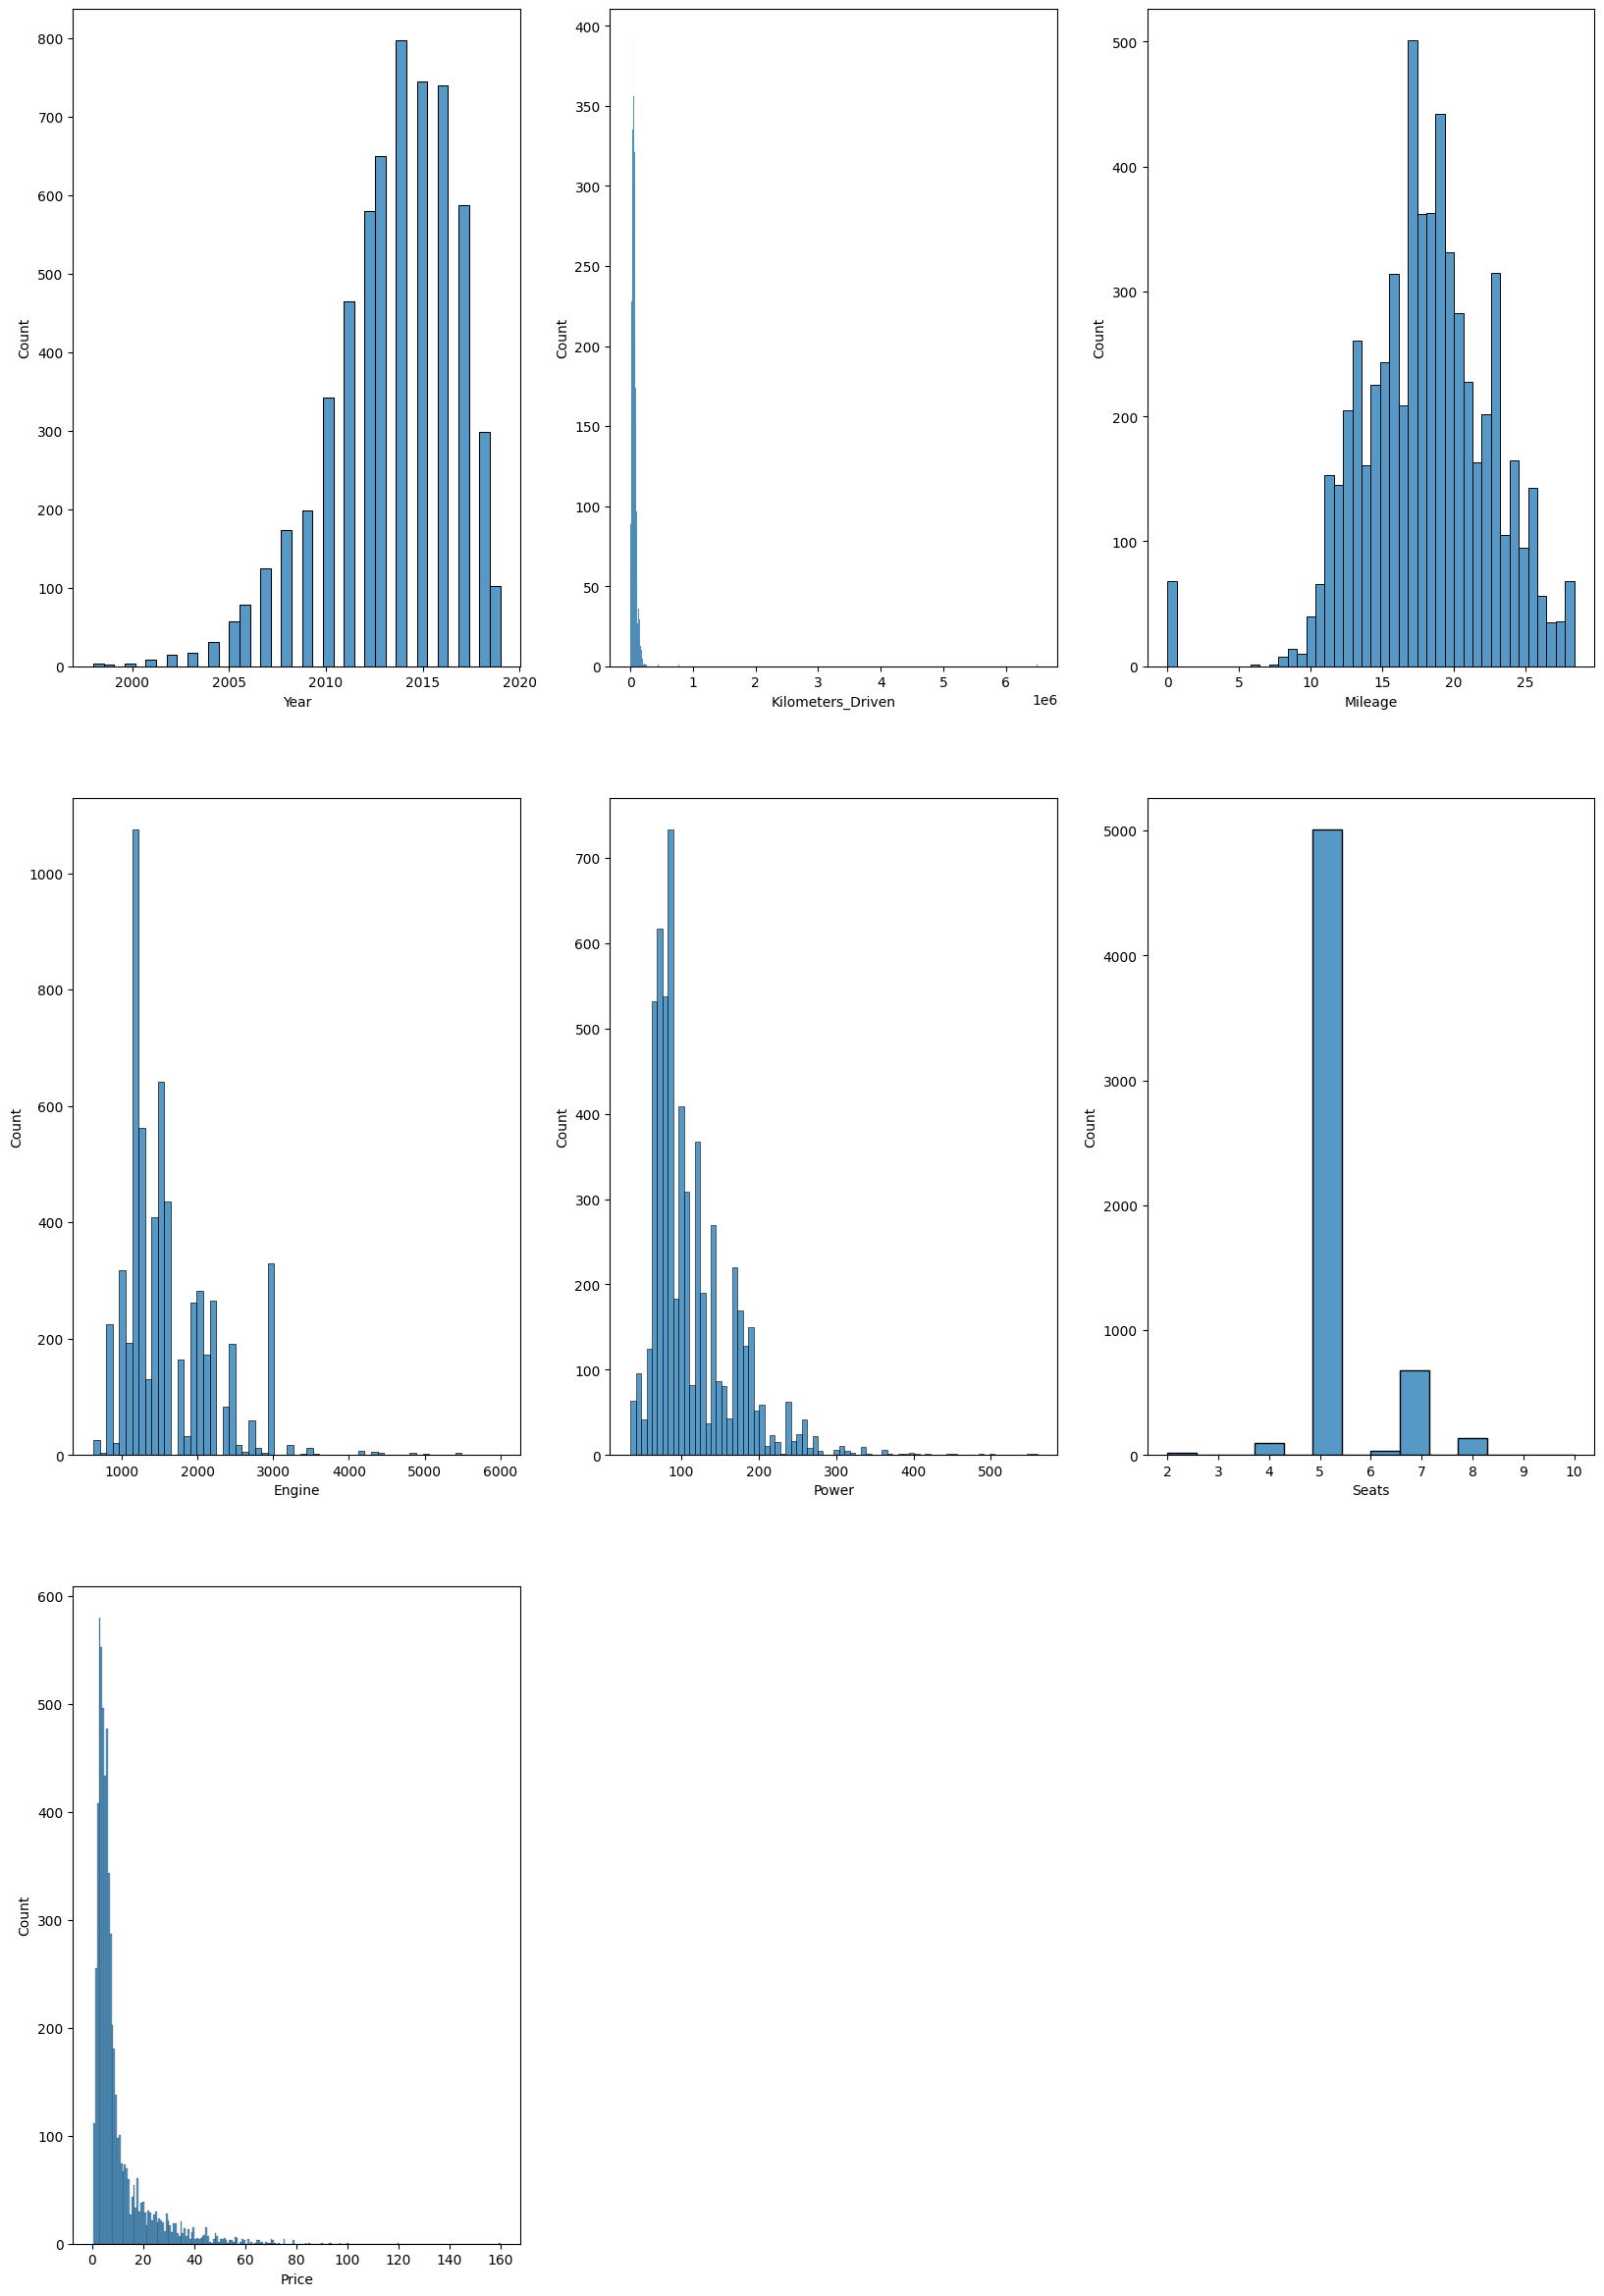

In [41]:
plt.figure(figsize = (20 , 40))
for i , col in enumerate (numerical_features  ,1) :
    plt.subplot((len(numerical_features)//2+1) , 3 , i )
    sns.histplot(data = df_clean , x = col)

### Relationship between Columns

#### Relationship between Location and price

In [42]:
loc_price = df_clean.groupby('Location')['Price'].mean().sort_values(ascending=False)
fig = px.bar(loc_price , color = loc_price.index )
fig.show()

#### Relationship between Fuel_Type and price

In [43]:
fuel_price = df_clean.groupby('Fuel_Type')['Price'].mean().sort_values(ascending=False)
fig = px.bar(fuel_price , color = fuel_price.index )
fig.show()

#### Relationship between Transmission and price

In [46]:
trans_price = df_clean.groupby('Transmission')['Price'].mean().sort_values(ascending=False)
fig = px.bar(trans_price , color = trans_price.index )
fig.show()

#### Relationship between Owner_Type and price

In [47]:
owner_price = df_clean.groupby('Owner_Type')['Price'].mean().sort_values(ascending=False)
fig = px.bar(owner_price , color = owner_price.index )
fig.show()

#### Relationship between brand and price

In [48]:
brand_price = df_clean.groupby('brand')['Price'].mean().sort_values(ascending=False)
fig = px.bar(brand_price , color = brand_price.index )
fig.show()

#### Relationship between Year and price

In [49]:
year_price = df_clean.groupby('Year')['Price'].mean()
fig = px.bar(year_price , color = year_price.index )
fig.show()

#### Relationship between Kilometers_Driven and price

In [51]:
fig = px.scatter(df_clean , x = np.log(df_clean['Kilometers_Driven']),y= np.log(df_clean['Price']) ,trendline='ols')
fig.show()

#### Relationship between Mileage and price

In [52]:
fig = px.scatter(df_clean , x =(df_clean['Mileage']),y= (df_clean['Price']), trendline='ols')
fig.show()

#### Relationship between Engine and price

In [53]:
fig = px.scatter(df_clean , x = np.log(df_clean['Engine']),y= np.log(df_clean['Price']), trendline='ols')
fig.show()

#### Relationship Power Year and price

In [54]:
fig = px.scatter(df_clean , x = np.log(df_clean['Power']),y= np.log(df_clean['Price']) ,trendline='ols')
fig.show()

#### Relationship between Seats and price

In [55]:
seet_price = df_clean.groupby('Seats')['Price'].mean()
fig = px.bar(seet_price , color = seet_price.index )
fig.show()